# INTRO: Celebrity IMDB Network Graph

I'm curious about the numerous celebrities involved in different long-running TV franchises, like Baywatch, Law & Order, CSI, Stargate, 9-1-1.

There's a variety of roles that actors can have in these franchises. From leading roles to extra work, I want to visualize these careers and find the oddities along the way.

One current celebrity that comes to mind is Jason Momoa, who has been in (at least) Baywatch, Stargate, Game of Thrones, and the DC Universe. Another category of interest is in the early-career appearances on shows like Law & Order. Actors such as Timothee Chalamet, Adam Driver, and Zoe Saldana appear in Law & Order well before their big, break-out roles.

I'd like to trace the career of these celebrities and see how they relate. Perhaps there's something similar or significant about the management / representation that these actors have. Perhaps I'll find a way to discover up-and-coming talent. Perhaps this is just a silly thought exercise to play in the sandbox. 

# Data Model
I've been pondering the target data model for this visualization. I figure I'll have data from odd sources and different structures for those, but I'll need to unify things.

So here's what I'm thinking for a target data model

In [3]:
target_data_model = [
    {
        "franchise_name": "Macgyver",
        "celebrities": [
            {
                "actor": "Richard Dean Anderson",
                "character": 'Angus "Mac" MacGyver',
                "appears_in": [
                    {
                        "installment": "MacGyver",
                        "start": 1985,
                        "end": 1994 
                    }
                ]
            }
        ]
    },
    {
        "franchise_name": "Baywatch",
        "celebrities" : [
            {
                "actor": "Jason Momoa",
                "character": "Jason Ioane",
                "appears_in": [ 
                    {
                        "installment": "Baywatch: Hawaii",
                        "start": 1999,
                        "end": 2001
                    }
                ],
            }
        ]
    },
    {
        "franchise_name": "Stargate",
        "celebrities": [
            {
                "actor": "Jason Momoa",
                "character": "Ronon",
                "appears_in": [ 
                    {
                        "installment": "Stargate Atlantis",
                        "start": 2005,
                        "end": 2009
                    } 
                ]
            },
            {
                "actor": "Richard Dean Anderson",
                "character": "Jack O'Neill",
                "appears_in": [
                    {
                        "installment": "Stargate SG1",
                        "start": 1997,
                        "end": 2005
                    },
                    {
                        "installment": "Stargate Atlantis",
                        "start": 2003,
                        "end": 2007
                    },
                    {
                        "installment": "Stargate Universe",
                        "start": 2009,
                        "end": 2011
                    }
                ]
            }
        ]
    },
    {
        "franchise_name": "Game of Thrones",
        "celebrities": [
            {
                "actor": "Jason Momoa",
                "character": "Khal Drogo",
                "appears_in": [ 
                    {
                        "installment": "Game of Thrones",
                        "start": 2009,
                        "end": 2012
                    }
                ]
            }
        ]
    }
]

I've just realized that I may have a tough time relating different shows to their franchises. I wonder if IMDB or other data sources have that context or if I'll need to create that myself.

For example, will I be able to tell that Stargate: Atlantis is related to Stargate: SG1?

# Data Model, Trial 2
Okay after a few frustrating attempts at parsing, that nested mess turned out to be a silly target data model this early on in the project. I'm going to leave it for future reference and switch to a flattened model for faster iteration in the short term. I'll come back to it later since I think it's closer to the right long term model, but I don't want to deal with the headaches right now.

Instead, let's try this as a data model...

In [17]:
flattened_data_model = [
    {
        "character": 'Angus "Mac" MacGyver',
        "actor": "Richard Dean Anderson",
        "franchise_name": "Macgyver",
        "installment": "MacGyver",
        "start": 1985,
        "end": 1994
    },
    {
        "character": "Wyatt Porter",
        "actor": "Don S. Davis",
        "franchise_name": "MacGyver",
        "installment": "MacGyver",
        "start": 1987,
        "end": 1988
    },
    {
        "character": "Lt. Donnelly",
        "actor": "Don S. Davis",
        "franchise_name": "21 Jump Street",
        "installment": "21 Jump Street",
        "start": 1987,
        "end": 1991
    },
    {
        "character": "Balloon Salesman // Waiter",
        "actor": "Sam Lloyd",
        "franchise_name": "Night Court",
        "installment": "Night Court",
        "start": 1988,
        "end": 1989
    },
    {
        "character": 'Mitch Buchannon',
        "actor": "David Hasselhoff",
        "franchise_name": "Baywatch",
        "installment": "Baywatch",
        "start": 1989,
        "end": 2000
    },
    {
        "character": 'Mitch Buchannon',
        "actor": "David Hasselhoff",
        "franchise_name": "Baywatch",
        "installment": "Baywatch Nights",
        "start": 1995,
        "end": 1997
    },
    {
        "character": "Dana Scully",
        "actor": "Gillian Anderson",
        "franchise_name": "The X-Files",
        "installment": "The X-Files",
        "start": 1993,
        "end": 2018
    },
    {
        "character": "Dr. Gary Meyers",
        "actor": "Richard Kind",
        "franchise_name": "Stargate",
        "installment": "Stargate",
        "start": 1994,
        "end": 1994
    },
    {
        "character": "Paul Sandig",
        "actor": "Victor Garber",
        "franchise_name": "Law & Order",
        "installment": "Law & Order",
        "start": 1995,
        "end": 1995
    },
    {
        "character": "Amy Jacobs",
        "actor": "Jewel Staite",
        "franchise_name": "The X-Files",
        "installment": "The X-Files",
        "start": 1995,
        "end": 1995
    },
    {
        "character": "Jason Ioane",
        "actor": "Jason Momoa",
        "franchise_name": "Baywatch",
        "installment": "Baywatch: Hawaii",
        "start": 1999,
        "end": 2001
    },
    {
        "character": "David Scatino",
        "actor": "Robert Patrick",
        "franchise_name": "The Sopranos",
        "installment": "The Sopranos",
        "start": 2000,
        "end": 2000
    },
    {
        "character": "John Doggett",
        "actor": "Robert Patrick",
        "franchise_name": "The X-Files",
        "installment": "The X-Files",
        "start": 2000,
        "end": 2002
    },
    {
        "character": "Ted Buckland",
        "actor": "Sam Lloyd",
        "franchise_name": "Scrubs",
        "installment": "Scrubs",
        "start": 2001,
        "end": 2009
    },
    {
        "character": "Jordan Sullivan",
        "actor": "Christa Miller",
        "franchise_name": "Scrubs",
        "installment": "Scrubs",
        "start": 2001,
        "end": 2010
    },
    {
        "character": "Kaylee Frye",
        "actor": "Jewel Staite",
        "franchise_name": "Firefly",
        "installment": "Firefly",
        "start": 2002,
        "end": 2003
    },
    {
        "character": "Ronon",
        "actor": "Jason Momoa",
        "franchise_name": "Stargate",
        "installment": "Stargate Atlantis",
        "start": 2005,
        "end": 2009
    },
    {
        "character": "Colonel Marshall Sumner",
        "actor": "Robert Patrick",
        "franchise_name": "Stargate",
        "installment": "Stargate Atlantis",
        "start": 2004,
        "end": 2004
    },
    {
        "character": "Theresa Diaz",
        "actor": "Navi Rawat",
        "franchise_name": "The O.C.",
        "installment": "The O.C.",
        "start": 2005,
        "end": 2010
    },
    {
        "character": "Dr. Jennifer Keller",
        "actor": "Jewel Staite",
        "franchise_name": "Stargate",
        "installment": "Stargate Atlantis",
        "start": 2005,
        "end": 2009
    },
    {
        "character": "Jack O'Neill",
        "actor": "Richard Dean Anderson",
        "franchise_name": "Stargate",
        "installment": "Stargate SG1",
        "start": 1997,
        "end": 2005
    },
    {
        "character": "George Hammond", # has various titles during his tenure
        "actor": "Don S. Davis",
        "franchise_name": "Stargate",
        "installment": "Stargate SG1",
        "start": 1997,
        "end": 2007
    },
    {
        "character": "Major Paul Davis",
        "actor": "Colin Cunningham",
        "franchise_name": "Stargate",
        "installment": "Stargate SG1",
        "start": 1998,
        "end": 2005
    },
    {
        "character": "Agent Ian Edgerton",
        "actor": "Lou Diamond Phillips",
        "franchise_name": "Numb3rs",
        "installment": "Numb3rs",
        "start": 2005,
        "end": 2010
    },
    {
        "character": "Amita Ramanujan",
        "actor": "Navi Rawat",
        "franchise_name": "Numb3rs",
        "installment": "Numb3rs",
        "start": 2005,
        "end": 2010
    },
    {
        "character": "Nadine Hodges",
        "actor": "Sarah Carter",
        "franchise_name": "Numb3rs",
        "installment": "Numb3rs",
        "start": 2005,
        "end": 2005
    },
    {
        "character": "Det. Gary Walker",
        "actor": "Will Patton",
        "franchise_name": "Numb3rs",
        "installment": "Numb3rs",
        "start": 2006,
        "end": 2007
    },
    {
        "character": "Group Leader",
        "actor": "Sam Lloyd",
        "franchise_name": "Numb3rs",
        "installment": "Numb3rs",
        "start": 2009,
        "end": 2009
    },
    {
        "character": "Lucius Lavin",
        "actor": "Richard Kind",
        "franchise_name": "Stargate",
        "installment": "Stargate Atlantis",
        "start": 2006,
        "end": 2006
    },
    {
        "character": "Todd the Wraith", # also other characters (TODO: represent these characters too)
        "actor": "Christopher Heyerdahl",
        "franchise_name": "Stargate",
        "installment": "Stargate Atlantis",
        "start": 2004,
        "end": 2009
    },
    {
        "character": "Colonel David Telford",
        "actor": "Lou Diamond Phillips",
        "franchise_name": "Stargate",
        "installment": "Stargate Universe",
        "start": 2011,
        "end": 2013
    },
    {
        "character": "Fiona Wallace",
        "actor": "Lisa Kudrow",
        "franchise_name": "Web Therapy", # there's something odd about the dates for this show :(
        "installment": "Web Therapy",
        "start": 2008,
        "end": 2014
    },
    {
        "character": "Hayley Feldman-Tate",
        "actor": "Rashida Jones",
        "franchise_name": "Web Therapy",
        "installment": "Web Therapy",
        "start": 2008,
        "end": 2014
    },
    {
        "character": "Kip Wallice",
        "actor": "Victor Garber",
        "franchise_name": "Web Therapy",
        "installment": "Web Therapy",
        "start": 2009,
        "end": 2014
    },
    {
        "character": "Jules Cobb",
        "actor": "Courtney Cox",
        "franchise_name": "Cougar Town",
        "installment": "Cougar Town",
        "start": 2009,
        "end": 2015
    },
    {
        "character": "Ellie Torres",
        "actor": "Christa Miller",
        "franchise_name": "Cougar Town",
        "installment": "Cougar Town",
        "start": 2009,
        "end": 2015
    },
    {
        "character": "Laurie Keller",
        "actor": "Busy Philipps",
        "franchise_name": "Cougar Town",
        "installment": "Cougar Town",
        "start": 2009,
        "end": 2015
    },
    {
        "character": "Ted Buckland",
        "actor": "Sam Lloyd",
        "franchise_name": "Cougar Town",
        "installment": "Cougar Town",
        "start": 2011,
        "end": 2012
    },
    {
        "character": "Lou Diamond Phillips",
        "actor": "Lou Diamond Phillips",
        "franchise_name": "Cougar Town",
        "installment": "Cougar Town",
        "start": 2011,
        "end": 2013
    },
    {
        "character": "Khal Drogo",
        "actor": "Jason Momoa",
        "franchise_name": "Game of Thrones",
        "installment": "Game of Thrones",
        "start": 2009,
        "end": 2012
    },
    {
        "character": "The Form of David Hasselhoff",
        "actor": "David Hasselhoff",
        "franchise_name": "Marvel",
        "installment": "Guardians of the Galaxy Vol. 2",
        "start": 2009,
        "end": 2012
    },
    {
        "character": "Ambassador Ovirda",
        "actor": "Victor Garber",
        "franchise_name": "Stargate",
        "installment": "Stargate Universe",
        "start": 2011,
        "end": 2011
    },
    {
        "character": "Tom Mason",
        "actor": "Noah Wyle",
        "franchise_name": "Falling Skies",
        "installment": "Falling Skies",
        "start": 2011,
        "end": 2015
    },
    {
        "character": "Captain Dan Weaver",
        "actor": "Will Patton",
        "franchise_name": "Falling Skies",
        "installment": "Falling Skies",
        "start": 2011,
        "end": 2015
    },
    {
        "character": "Margaret",
        "actor": "Sarah Carter",
        "franchise_name": "Falling Skies",
        "installment": "Falling Skies",
        "start": 2011,
        "end": 2015
    },
    {
        "character": "John Pope",
        "actor": "Colin Cunningham",
        "franchise_name": "Falling Skies",
        "installment": "Falling Skies",
        "start": 2011,
        "end": 2015
    },
    {
        "character": "Sy Hoffman",
        "actor": "Richard Kind",
        "franchise_name": "Night Court",
        "installment": "Night Court",
        "start": 2024,
        "end": 2025
    },
    {
        "character": "Marty Glouberman",
        "actor": "Richard Kind",
        "franchise_name": "Big Mouth",
        "installment": "Big Mouth",
        "start": 2017,
        "end": 2025
    },
    {
        "character": "Abigail Bianchi",
        "actor": "Jewel Staite",
        "franchise_name": "Family Law",
        "installment": "Family Law",
        "start": 2021,
        "end": 2025
    }
]

# parse data model to pandas data frame
flat_df = pd.DataFrame(flattened_data_model)
flat_df.sort_values(by='start', inplace=True)
print(flat_df)

                       character                  actor   franchise_name  \
0           Angus "Mac" MacGyver  Richard Dean Anderson         Macgyver   
1                   Wyatt Porter           Don S. Davis         MacGyver   
2                   Lt. Donnelly           Don S. Davis   21 Jump Street   
3     Balloon Salesman // Waiter              Sam Lloyd      Night Court   
4                Mitch Buchannon       David Hasselhoff         Baywatch   
6                    Dana Scully       Gillian Anderson      The X-Files   
7                Dr. Gary Meyers           Richard Kind         Stargate   
5                Mitch Buchannon       David Hasselhoff         Baywatch   
8                    Paul Sandig          Victor Garber      Law & Order   
9                     Amy Jacobs           Jewel Staite      The X-Files   
20                  Jack O'Neill  Richard Dean Anderson         Stargate   
21                George Hammond           Don S. Davis         Stargate   
22          

TODO: resolve issue of multiple characters played by the same actor on the same franchise or installment

# Trial Visualizations
Let's try out some visualization techniques using the target data model as a starting point

In [24]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install ipympl --user

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for ipympl from https://files.pythonhosted.org/packages/86/6b/21c62f1b2b5e18c6553f7364487dfdf7eb7952b1000a1b7863c1f97819e9/ipympl-0.9.7-py3-none-any.whl.metadata
  Using cached ipympl-0.9.7-py3-none-any.whl.metadata (8.7 kB)
  Obtaining dependency information for ipywidgets<9,>=7.6.0 from https://files.pythonhosted.org/packages/58/6a/9166369a2f092bd286d24e6307de555d63616e8ddb373ebad2b5635ca4cd/ipywidgets-8.1.7-py3-none-any.whl.metadata
  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
Using cached ipympl-0.9.7-py3-none-any.whl (515 kB)
Using cached ipywidgets-8.1.7-py3-none-any.whl (139 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget

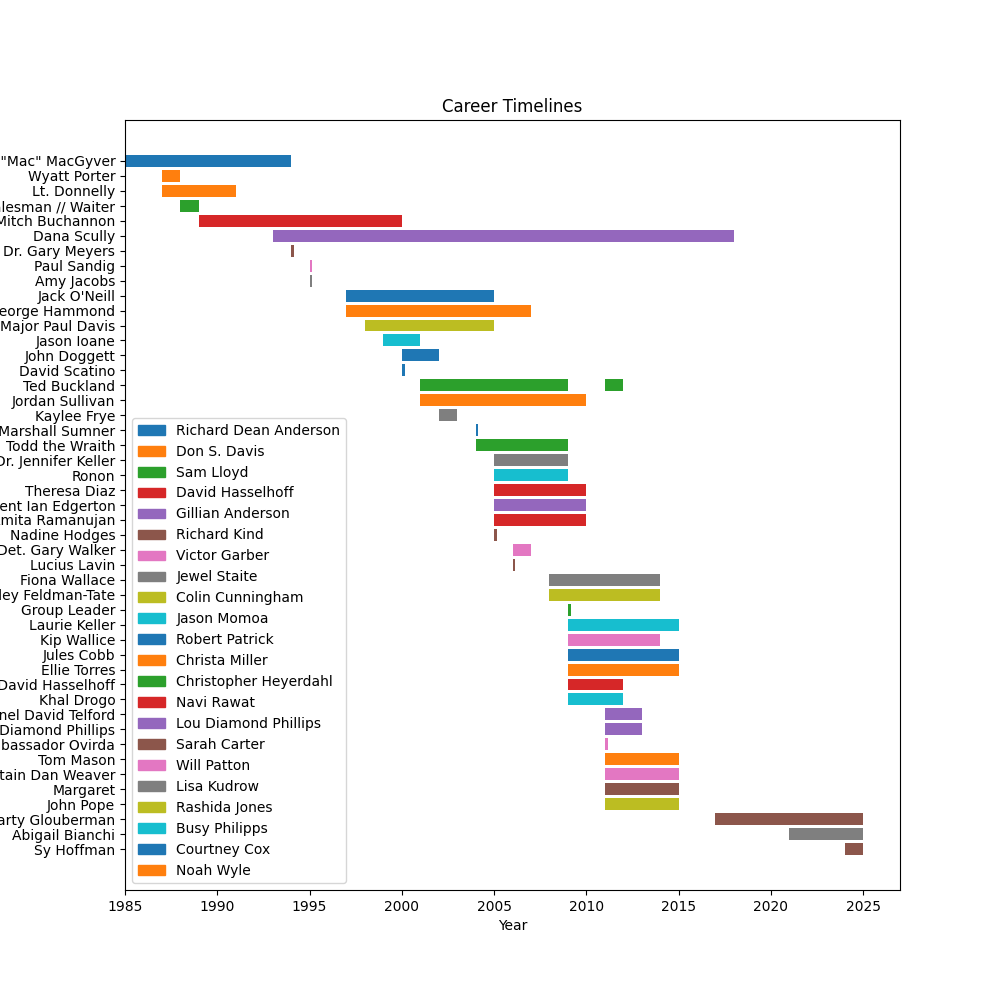

In [27]:
# add duration column to data model
flat_df["appearance_duration"] = flat_df["end"] - flat_df["start"]

# color code by actor, using built-in property cycle
color_code_actor = {}
colors = plt.rcParams["axes.prop_cycle"]()
patches = [] # for identifying in plot legend
for actor in flat_df["actor"].unique():
    color_code_actor[actor] = next(colors)["color"]
    patches.append(matplotlib.patches.Patch(color=color_code_actor[actor]))

# plot flattened data model as Gantt chart
fig = plt.figure(figsize=(10, 10))
for index, row in flat_df.iterrows():
    if row["appearance_duration"] < 1:
        plt.barh(y=row["character"],
                 left=row["start"],
                 width=.15,
                 color=color_code_actor[row["actor"]])
    else:
        plt.barh(y=row["character"],
                 left=row["start"],
                 width=row["appearance_duration"], 
                 color=color_code_actor[row["actor"]])
plt.title('Career Timelines')
plt.ylabel('Character')
plt.xlabel('Year')
plt.gca().invert_yaxis()
plt.legend(handles=patches, labels=color_code_actor.keys())
plt.show()

Now let's try 3D plotting before moving over to network diagramming

TODO: show franchise and any overlap or cross-over between actors/characters

TODO: Check out plt.broken_barh() to help with hiatuses or pauses in show runtime

# Now let's check out network graphs!

In [6]:
!pip install networkx


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import networkx as nx

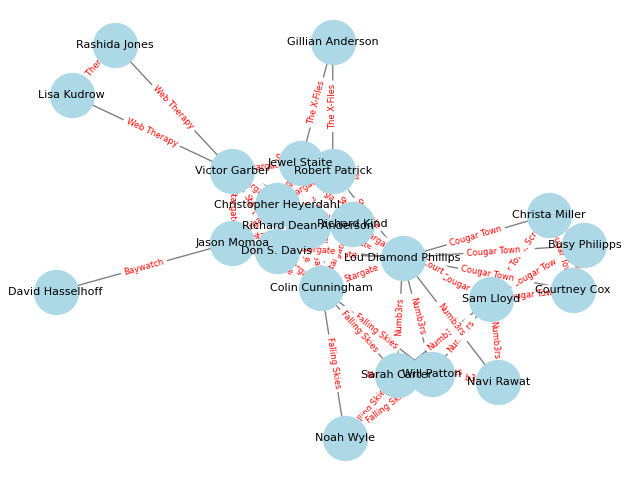

In [20]:
# Build actor network graph based on shared franchises
G = nx.Graph()

# Add nodes for each actor
for actor in flat_df['actor'].unique():
    G.add_node(actor)

# For each franchise, connect all actors who appeared in it
for franchise, group in flat_df.groupby('franchise_name'):
    actors = group['actor'].unique()
    for i in range(len(actors)):
        for j in range(i+1, len(actors)):
            if G.has_edge(actors[i], actors[j]):
                # If edge exists, append franchise to the label
                if 'franchises' in G[actors[i]][actors[j]]:
                    G[actors[i]][actors[j]]['franchises'].add(franchise)
                else:
                    G[actors[i]][actors[j]]['franchises'] = {franchise}
            else:
                G.add_edge(actors[i], actors[j], franchises={franchise})

# Draw the graph
plt.figure()
pos = nx.spring_layout(G, seed=58)
labels = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=8)

# Optionally, print edge labels (franchises shared)
edge_labels = {(u, v): ', '.join(G[u][v]['franchises']) for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)
plt.title('Actor Network by Shared Franchise')
plt.show()

As I'm playing around with getting data, I'm starting to wonder about this analysis. It seems like the actors I've focused on are almost entirely male and I'm not sure if that's my own bias or if that's just how the industry works for men rather than women... Something to think about.

Now let's try making a multi-edge network graph of franchises as nodes with actors connecting them

Busy Philipps appears in ['Cougar Town']
Christa Miller appears in ['Scrubs' 'Cougar Town']
Christopher Heyerdahl appears in ['Stargate']
Colin Cunningham appears in ['Stargate' 'Falling Skies']
Courtney Cox appears in ['Cougar Town']
David Hasselhoff appears in ['Baywatch' 'Marvel']
Don S. Davis appears in ['MacGyver' '21 Jump Street' 'Stargate']
Gillian Anderson appears in ['The X-Files']
Jason Momoa appears in ['Baywatch' 'Stargate' 'Game of Thrones']
Jewel Staite appears in ['The X-Files' 'Firefly' 'Stargate' 'Family Law']
Lisa Kudrow appears in ['Web Therapy']
Lou Diamond Phillips appears in ['Numb3rs' 'Stargate' 'Cougar Town']
Navi Rawat appears in ['The O.C.' 'Numb3rs']
Noah Wyle appears in ['Falling Skies']
Rashida Jones appears in ['Web Therapy']
Richard Dean Anderson appears in ['Macgyver' 'Stargate']
Richard Kind appears in ['Stargate' 'Big Mouth' 'Night Court']
Robert Patrick appears in ['The X-Files' 'The Sopranos' 'Stargate']
Sam Lloyd appears in ['Night Court' 'Scrubs' '

C:\Users\Peter\AppData\Local\Temp\ipykernel_13964\2789984499.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


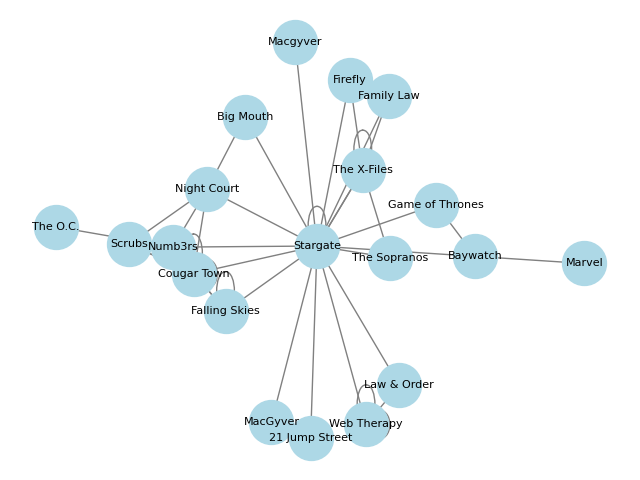

In [30]:
franchise_graph = nx.MultiGraph()

# create nodes for graph of franchises
for franchise in flat_df["franchise_name"].unique():
    franchise_graph.add_node(franchise)

# create edges based on actors appearances in various franchises
for actor, group in flat_df.groupby(by='actor'):
    franchises = group["franchise_name"].unique()
    print(f'{actor} appears in {franchises}')
    if len(franchises) == 1:
        franchise_graph.add_edge(franchises[0], franchises[0], actor_link={actor})
    else:
        for i in range(len(franchises)):
            for j in range(i+1, len(franchises)):
                franchise_graph.add_edge(franchises[i], franchises[j], actor_link={actor})

plt.figure()
pos = nx.spring_layout(franchise_graph, seed=58)
labels = {node: node for node in franchise_graph.nodes()}
nx.draw(franchise_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=8)
plt.title('Franchise Network by Shared Actors')
plt.show()